<a href="https://colab.research.google.com/github/minhyeok2001/Computer-Vision/blob/main/FCN_for_ISBI_2012_EM_stacks_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공식 data 가져오기 ( 공식 사이트는 막혀서 깃허브에서 가져옴 )


In [ ]:
!git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git

Cloning into 'youtube-cnn-002-pytorch-unet'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 29), reused 52 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 14.27 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
%cd youtube-cnn-002-pytorch-unet
!ls

/content/youtube-cnn-002-pytorch-unet
data_read.py  datasets		  eval.py   README.md	    train.py
dataset.py    display_results.py  model.py  run_unet.ipynb  util.py


Train Inputs Shape: (24, 512, 512)
Train Labels Shape: (24, 512, 512)
Validation Inputs Shape: (3, 512, 512)
Validation Labels Shape: (3, 512, 512)
Test Inputs Shape: (3, 512, 512)
Test Labels Shape: (3, 512, 512)


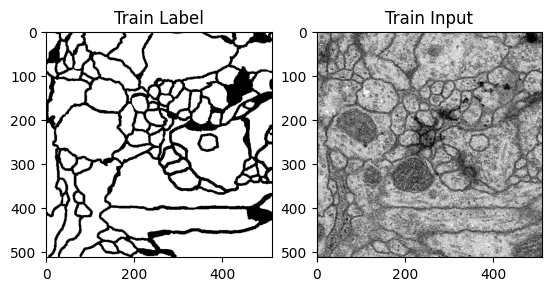

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 데이터 경로 설정
dir_data = './datasets'
name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

# 이미지 열기
img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

# 이미지 크기 및 프레임 수 확인
ny, nx = img_label.size
nframe = img_label.n_frames

# 데이터셋 분리 크기 설정
nframe_train = 24
nframe_val = 3
nframe_test = 3

# 프레임 셔플
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

# 데이터를 저장할 리스트
inputs_train, labels_train = [], []  # 학습 데이터
inputs_val, labels_val = [], []      # 검증 데이터
inputs_test, labels_test = [], []    # 테스트 데이터

# 학습 데이터 수집
offset_nframe = 0
for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    labels_train.append(np.asarray(img_label))
    inputs_train.append(np.asarray(img_input))

# 검증 데이터 수집
offset_nframe = nframe_train
for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    labels_val.append(np.asarray(img_label))
    inputs_val.append(np.asarray(img_input))

# 테스트 데이터 수집
offset_nframe = nframe_train + nframe_val
for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])
    labels_test.append(np.asarray(img_label))
    inputs_test.append(np.asarray(img_input))

# 리스트를 NumPy 배열로 변환
inputs_train = np.array(inputs_train)
labels_train = np.array(labels_train)
inputs_val = np.array(inputs_val)
labels_val = np.array(labels_val)
inputs_test = np.array(inputs_test)
labels_test = np.array(labels_test)

# 저장된 데이터 확인
print(f"Train Inputs Shape: {inputs_train.shape}")
print(f"Train Labels Shape: {labels_train.shape}")
print(f"Validation Inputs Shape: {inputs_val.shape}")
print(f"Validation Labels Shape: {labels_val.shape}")
print(f"Test Inputs Shape: {inputs_test.shape}")
print(f"Test Labels Shape: {labels_test.shape}")

# 첫 번째 학습 데이터 시각화
plt.subplot(121)
plt.imshow(labels_train[0], cmap='gray')
plt.title('Train Label')

plt.subplot(122)
plt.imshow(inputs_train[0], cmap='gray')
plt.title('Train Input')

plt.show()

In [ ]:
type(inputs_train)

numpy.ndarray

-> 아하.. 0 또는 1이 아니라 , 0 또는 255로 되어있으므로, 0,1로 바꿔줘야함

In [ ]:
print(labels_train)

[[[255 255 255 ... 255 255 255]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

In [ ]:
labels_train = [np.where(label == 255, 1 , label) for label in labels_train]
labels_val = [np.where(label == 255, 1 , label) for label in labels_val]
labels_test = [np.where(label == 255, 1 , label) for label in labels_test]

In [ ]:
print(labels_train)

[array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 0

# dataloader에 올리기 ( with torchvision.transforms)
- 기억하겠지만, 이거 customdataset 만들어야함
  - 까먹은거같아서 다시정리. Customdataset에서 기대하는 것 : 인풋과 정답을 무더기로 넣고, idx별로 하나씩 출력할 수 있도록 __getitem__ 정의하는것.
- compose 내부에는 배열로 하나하나 transforms.~ 넣어주기


- 헉 trasnformation은 val, test라고 빼면 안됨 !!
  
  -> 다만 이거 전처리부분만 더해주면 괜찮을거같기는 한데,. 굳이 augmentation 같은거를 적용시킬 필요는 없다고 판단됨. ( 개인적으로.. )





In [ ]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
    #transforms.RandomHorizontalFlip()
])

In [ ]:
class customdataset(torch.utils.data.Dataset):
  def __init__(self,inputs,labels,transform=None):
    self.inputs = inputs
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.inputs)

  def __getitem__(self,idx):
    input = self.inputs[idx]

    if self.transform :
      input = self.transform(input)

    label = self.labels[idx]
    return input,label

만든 데이터로더는 클래스니까 객체 생성하고 그 다음에 그걸 DataLoader에 올리기

In [ ]:
train= customdataset(inputs_train,labels_train,transform)
val = customdataset(inputs_val,labels_val,transform)
test = customdataset(inputs_test,labels_test,transform)

In [ ]:
train_loader = torch.utils.data.DataLoader(train,batch_size=4,shuffle=True)
val_loader = torch.utils.data.DataLoader(val,batch_size=4,shuffle=True)
test_loader = torch.utils.data.DataLoader(test,batch_size=4,shuffle=True)

In [ ]:
for input,label in train_loader:
  print(input.shape)
  print(label.shape) # 의문점. 분명 내가 알기로 우리 task는 각 픽셀의 클래스 예측이었는데, 이렇게 보면 우리는 그냥 각 픽셀이 얼마나 검은지 그거 맞추는거같은데??
  break

torch.Size([4, 1, 512, 512])
torch.Size([4, 512, 512])


의문점 해결을 위해 일단 label 출력

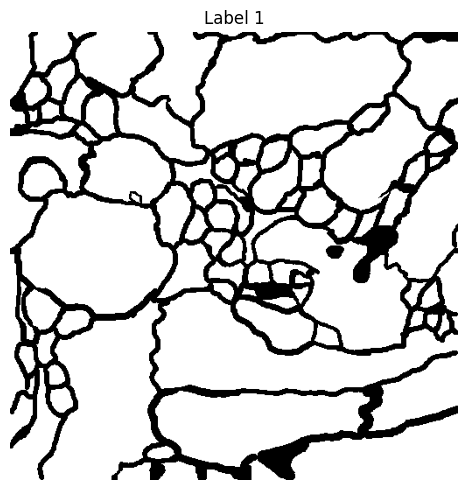

In [ ]:
for i, (_, label) in enumerate(train_loader):  # i와 label을 가져옴
    plt.figure(figsize=(15, 5))

    # 라벨 이미지를 그리기
    plt.subplot(1, 1, 1)  # 한 번에 하나의 이미지를 그리므로 1행 1열로 설정
    plt.imshow(label[0].cpu().numpy(), cmap='gray', vmin=0, vmax=1)  # 첫 번째 라벨 시각화
    plt.title(f"Label {i+1}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    break  # 첫 번째 배치만 시각화 후 종료

=> 위 그림을 보면, 단순히 0 또는 1로만 되어있음 ( 흑백 or 흰색 ). 즉 클래스 구분이라고 볼 수 있음
 평가지표는 iou같은거 사용. (아래에서 기술하겠씀)


In [ ]:
for input,label in train_loader:
  print(input)
  break

for input,label in val_loader:
  print(input)
  break

tensor([[[[-0.6706, -0.5765, -0.5529,  ..., -0.1765, -0.3020, -0.2627],
          [-0.5765, -0.5216, -0.5765,  ..., -0.0824, -0.2549, -0.1843],
          [-0.5059, -0.5216, -0.5922,  ...,  0.0980, -0.0353, -0.0118],
          ...,
          [ 0.1922,  0.2706,  0.1608,  ..., -0.3255, -0.4667, -0.6000],
          [ 0.1843,  0.2941,  0.2314,  ..., -0.3490, -0.4902, -0.4980],
          [ 0.2392,  0.3255,  0.2314,  ..., -0.4039, -0.3725, -0.3647]]],


        [[[-0.2314, -0.2863, -0.1608,  ..., -0.0902, -0.2784, -0.3961],
          [-0.3255, -0.2392, -0.0745,  ..., -0.3882, -0.4667, -0.3882],
          [-0.4353, -0.3412, -0.1608,  ..., -0.5137, -0.4980, -0.3882],
          ...,
          [-0.2000, -0.4275, -0.3882,  ...,  0.0745,  0.0745,  0.0353],
          [-0.0510, -0.2863, -0.2392,  ..., -0.0745, -0.0902,  0.0118],
          [ 0.0196, -0.1373, -0.2784,  ..., -0.1059, -0.1529, -0.0510]]],


        [[[-0.5843, -0.2078,  0.4667,  ..., -0.2549, -0.3412, -0.2157],
          [-0.6314, -0.066


# FCN
## 1. without skip connection
- U_net의 base가 되는 FCN 먼저 구현후 실행시키기
- FCN의 core part는 뭐야?
  -> 1x1 conv layer ( 위치정보 기억 + dim을 클래스 개수로 조정 ) & upsampling layer ( deconv )
- 이렇게 하자. 일단 downsampling conv 레이어 3개 -> 1x1 conv 1개 -> upsampling deconv 레이어 3개

In [ ]:
import torch.nn as nn

## input : 1x512x512

class conv(nn.Module):
  def __init__(self):
    super().__init__()
    self.c1 = nn.Conv2d(1,8,kernel_size=3,padding=1)
    self.c2 = nn.Conv2d(8,16,kernel_size=3,padding=1)
    self.c3 = nn.Conv2d(16,16,kernel_size=3,padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.act = nn.ReLU()

  def forward(self,x):
    x=self.c1(x)
    x=self.act(x)
    x=self.pool(x)
    x=self.c2(x)
    x=self.act(x)
    x=self.pool(x)
    x=self.c3(x)
    x=self.act(x)
    x=self.pool(x)
    return x

# class : 흑 or 백 두개이므로 out_dim은 2가 되는게 맞음

class convolutionalization(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Conv2d(16,16,kernel_size=1)
    self.act = nn.ReLU()

  def forward(self,x):
    x=self.conv(x)
    x=self.act(x)
    return x


class deconv(nn.Module):  ## 아하. 여기서 dim은 conv할때랑 똑같이 가야지 !! 그래야 나중에 skip connection 구현가능
  def __init__(self):
    super().__init__()
    self.deconv1 = nn.ConvTranspose2d(16,16,kernel_size=2,stride=2)
    self.deconv2 = nn.ConvTranspose2d(16,8,kernel_size=2,stride=2)
    self.deconv3 = nn.ConvTranspose2d(8,2,kernel_size=2,stride=2)
    self.act = nn.ReLU()

  def forward(self,x):
    x=self.deconv1(x)
    #print(x.shape)
    x=self.act(x)
    x=self.deconv2(x)
    #print(x.shape)
    x=self.act(x)
    x=self.deconv3(x)
    #print(x.shape)
    return x

class FCN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = conv()
    self.conv1x1 = convolutionalization()
    self.deconv = deconv()

  def forward(self,x):
    x=self.conv(x)
    x=self.conv1x1(x)
    x=self.deconv(x)
    return x

- 학습 & 검증

- 왜 train_loader에서 꺼낸 input하고 val_loader 에서 꺼낸 input하고 값이 너무 다르지?? 마치 앞에거는 정규화가 된거같이 생김. ..??

In [ ]:
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = FCN()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stop_loss = float('inf')

patience = 5

for epoch in tqdm(range(200)):
  train_loss = 0.0
  val_loss = 0.0
  model.train()

  for input,label in tqdm(train_loader):
    label = label.long()
    #print(input.shape)
    #print(input)
    optimizer.zero_grad()
    output = model(input)
    #print(output.shape)
    loss = loss_fn(output,label)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  print("\ntrain loss -> ", train_loss/len(train_loader))
  model.eval()
  with torch.no_grad():
    for input,label in val_loader:
      input = input.float()
      #print(input)
      label = label.long()
      output = model(input)
      loss = loss_fn(output,label)
      val_loss += loss.item()
  print("val loss -> ", val_loss/len(val_loader))

  scheduler.step(val_loss)

  if val_loss < early_stop_loss:
      early_stop_loss = val_loss
      counter = 0  # 성능 개선 시 카운터 초기화
  else:
      counter += 1
      if counter >= patience:
          print("Early stopping triggered")
          break


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.6291670699914297


  0%|          | 1/200 [00:09<32:52,  9.91s/it]

val loss ->  0.6211075782775879



100%|██████████| 6/6 [00:10<00:00,  1.67s/it]



train loss ->  0.62556720773379


  1%|          | 2/200 [00:20<34:24, 10.43s/it]

val loss ->  0.6170598864555359



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.6218573451042175


  2%|▏         | 3/200 [00:30<33:00, 10.05s/it]

val loss ->  0.6128481030464172



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.6179732183615366


  2%|▏         | 4/200 [00:40<32:38,  9.99s/it]

val loss ->  0.6082879304885864



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.6137255628903707


  2%|▎         | 5/200 [00:49<32:08,  9.89s/it]

val loss ->  0.6032600998878479



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.6088973979155222


  3%|▎         | 6/200 [01:00<32:24, 10.03s/it]

val loss ->  0.5969032645225525



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.6023258964220682


  4%|▎         | 7/200 [01:10<32:07,  9.99s/it]

val loss ->  0.5874442458152771



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.5923139850298563


  4%|▍         | 8/200 [01:19<31:39,  9.89s/it]

val loss ->  0.5718193650245667



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.5758323967456818


  4%|▍         | 9/200 [01:29<31:06,  9.77s/it]

val loss ->  0.547396719455719



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.5535389085610708


  5%|▌         | 10/200 [01:39<31:22,  9.91s/it]

val loss ->  0.5207808613777161



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.5320877134799957


  6%|▌         | 11/200 [01:49<31:34, 10.03s/it]

val loss ->  0.49807408452033997



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.5121090014775594


  6%|▌         | 12/200 [01:59<31:17,  9.99s/it]

val loss ->  0.48044589161872864



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.4973052094380061


  6%|▋         | 13/200 [02:09<31:13, 10.02s/it]

val loss ->  0.46888139843940735



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.4859941005706787


  7%|▋         | 14/200 [02:20<31:14, 10.08s/it]

val loss ->  0.46091607213020325



100%|██████████| 6/6 [00:10<00:00,  1.70s/it]



train loss ->  0.47708357870578766


  8%|▊         | 15/200 [02:30<31:49, 10.32s/it]

val loss ->  0.4536154270172119



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.4692238122224808


  8%|▊         | 16/200 [02:41<31:43, 10.35s/it]

val loss ->  0.44648897647857666



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.4603913923104604


  8%|▊         | 17/200 [02:51<31:36, 10.36s/it]

val loss ->  0.43895232677459717



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.4512573629617691


  9%|▉         | 18/200 [03:01<30:55, 10.20s/it]

val loss ->  0.43122902512550354



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.443554292122523


 10%|▉         | 19/200 [03:11<30:12, 10.01s/it]

val loss ->  0.4255574941635132



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.4371436486641566


 10%|█         | 20/200 [03:20<29:40,  9.89s/it]

val loss ->  0.4196716547012329



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.4315346231063207


 10%|█         | 21/200 [03:30<29:20,  9.83s/it]

val loss ->  0.4148445427417755



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.42672214408715564


 11%|█         | 22/200 [03:39<28:42,  9.67s/it]

val loss ->  0.4130598306655884



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.42338740825653076


 12%|█▏        | 23/200 [03:49<28:33,  9.68s/it]

val loss ->  0.40812933444976807



100%|██████████| 6/6 [00:09<00:00,  1.67s/it]



train loss ->  0.4209999392429988


 12%|█▏        | 24/200 [04:00<29:12,  9.96s/it]

val loss ->  0.4060339033603668



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.420846164226532


 12%|█▎        | 25/200 [04:09<28:43,  9.85s/it]

val loss ->  0.4035709798336029



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.4151451885700226


 13%|█▎        | 26/200 [04:19<28:36,  9.87s/it]

val loss ->  0.39889445900917053



100%|██████████| 6/6 [00:10<00:00,  1.68s/it]



train loss ->  0.4126889854669571


 14%|█▎        | 27/200 [04:30<29:15, 10.15s/it]

val loss ->  0.398151159286499



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.41039295494556427


 14%|█▍        | 28/200 [04:40<28:41, 10.01s/it]

val loss ->  0.3963017165660858



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.4077906012535095


 14%|█▍        | 29/200 [04:50<28:46, 10.10s/it]

val loss ->  0.3923060894012451



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.4061410427093506


 15%|█▌        | 30/200 [05:00<28:36, 10.10s/it]

val loss ->  0.39028605818748474



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.40353457629680634


 16%|█▌        | 31/200 [05:10<28:41, 10.19s/it]

val loss ->  0.386839359998703



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.401406188805898


 16%|█▌        | 32/200 [05:21<28:32, 10.19s/it]

val loss ->  0.3849605321884155



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3996322552363078


 16%|█▋        | 33/200 [05:30<28:07, 10.11s/it]

val loss ->  0.38485777378082275



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.39738694330056507


 17%|█▋        | 34/200 [05:41<28:06, 10.16s/it]

val loss ->  0.37940260767936707



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.3956596354643504


 18%|█▊        | 35/200 [05:51<28:03, 10.21s/it]

val loss ->  0.37876656651496887



100%|██████████| 6/6 [00:09<00:00,  1.67s/it]



train loss ->  0.39379628996054333


 18%|█▊        | 36/200 [06:02<28:17, 10.35s/it]

val loss ->  0.3745020925998688



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.38991262515385944


 18%|█▊        | 37/200 [06:11<27:35, 10.16s/it]

val loss ->  0.37460505962371826



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.3900166054566701


 19%|█▉        | 38/200 [06:21<27:03, 10.02s/it]

val loss ->  0.37094926834106445



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.389277383685112


 20%|█▉        | 39/200 [06:31<27:01, 10.07s/it]

val loss ->  0.36802971363067627



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.38849085569381714


 20%|██        | 40/200 [06:42<27:02, 10.14s/it]

val loss ->  0.37061038613319397



100%|██████████| 6/6 [00:09<00:00,  1.67s/it]



train loss ->  0.38498050967852276


 20%|██        | 41/200 [06:52<27:09, 10.25s/it]

val loss ->  0.36506617069244385



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.3806436409552892


 21%|██        | 42/200 [07:02<27:01, 10.26s/it]

val loss ->  0.364693284034729



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.3799521823724111


 22%|██▏       | 43/200 [07:13<26:53, 10.27s/it]

val loss ->  0.36013007164001465



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.37784844636917114


 22%|██▏       | 44/200 [07:23<26:48, 10.31s/it]

val loss ->  0.3584055006504059



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.3746470808982849


 22%|██▎       | 45/200 [07:33<25:56, 10.04s/it]

val loss ->  0.3561709225177765



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3720141500234604


 23%|██▎       | 46/200 [07:42<25:34,  9.97s/it]

val loss ->  0.3550722897052765



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.3704373041788737


 24%|██▎       | 47/200 [07:52<24:58,  9.80s/it]

val loss ->  0.35187864303588867



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.3677322069803874


 24%|██▍       | 48/200 [08:02<25:07,  9.92s/it]

val loss ->  0.3498380184173584



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.3656657685836156


 24%|██▍       | 49/200 [08:12<24:43,  9.82s/it]

val loss ->  0.3471660912036896



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3632541348536809


 25%|██▌       | 50/200 [08:21<24:23,  9.75s/it]

val loss ->  0.34437552094459534



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3624976873397827


 26%|██▌       | 51/200 [08:31<24:24,  9.83s/it]

val loss ->  0.3422384262084961



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3613427331050237


 26%|██▌       | 52/200 [08:41<24:22,  9.88s/it]

val loss ->  0.3396320343017578



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.35591817398866016


 26%|██▋       | 53/200 [08:51<24:17,  9.92s/it]

val loss ->  0.3364943265914917



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.35330715775489807


 27%|██▋       | 54/200 [09:01<24:24, 10.03s/it]

val loss ->  0.3340868651866913



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3507848381996155


 28%|██▊       | 55/200 [09:11<23:47,  9.84s/it]

val loss ->  0.3314342796802521



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.3484412531057994


 28%|██▊       | 56/200 [09:21<23:30,  9.80s/it]

val loss ->  0.329346626996994



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.34731409947077435


 28%|██▊       | 57/200 [09:31<23:47,  9.98s/it]

val loss ->  0.3272475302219391



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.3451220194498698


 29%|██▉       | 58/200 [09:41<23:50, 10.07s/it]

val loss ->  0.3252949118614197



100%|██████████| 6/6 [00:09<00:00,  1.67s/it]



train loss ->  0.345665176709493


 30%|██▉       | 59/200 [09:52<23:58, 10.20s/it]

val loss ->  0.3263686001300812



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.3435979634523392


 30%|███       | 60/200 [10:02<23:52, 10.23s/it]

val loss ->  0.3234282433986664



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.34078365564346313


 30%|███       | 61/200 [10:12<23:40, 10.22s/it]

val loss ->  0.32227182388305664



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.34016947944959003


 31%|███       | 62/200 [10:22<22:52,  9.95s/it]

val loss ->  0.320393830537796



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3381020973126094


 32%|███▏      | 63/200 [10:32<22:48,  9.99s/it]

val loss ->  0.31955718994140625



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.33754464983940125


 32%|███▏      | 64/200 [10:41<22:06,  9.75s/it]

val loss ->  0.31843969225883484



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.33767934143543243


 32%|███▎      | 65/200 [10:51<22:02,  9.80s/it]

val loss ->  0.31682220101356506



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3358224183320999


 33%|███▎      | 66/200 [11:01<22:00,  9.86s/it]

val loss ->  0.3158084452152252



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3340337425470352


 34%|███▎      | 67/200 [11:11<21:48,  9.84s/it]

val loss ->  0.31557562947273254



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3333047380050023


 34%|███▍      | 68/200 [11:21<21:49,  9.92s/it]

val loss ->  0.3146513104438782



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3334656258424123


 34%|███▍      | 69/200 [11:31<21:42,  9.94s/it]

val loss ->  0.3153080940246582



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.33166539669036865


 35%|███▌      | 70/200 [11:40<21:15,  9.81s/it]

val loss ->  0.3133838474750519



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.33243196705977124


 36%|███▌      | 71/200 [11:50<21:20,  9.93s/it]

val loss ->  0.31208691000938416



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.32919562856356305


 36%|███▌      | 72/200 [12:00<20:46,  9.74s/it]

val loss ->  0.31012511253356934



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.32886414726575214


 36%|███▋      | 73/200 [12:09<20:39,  9.76s/it]

val loss ->  0.31097161769866943



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.32729341089725494


 37%|███▋      | 74/200 [12:19<20:31,  9.77s/it]

val loss ->  0.3095843493938446



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.3271713008483251


 38%|███▊      | 75/200 [12:29<20:07,  9.66s/it]

val loss ->  0.30758050084114075



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.3267987122138341


 38%|███▊      | 76/200 [12:38<19:51,  9.61s/it]

val loss ->  0.30706313252449036



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.3260658433039983


 38%|███▊      | 77/200 [12:49<20:11,  9.85s/it]

val loss ->  0.30765262246131897



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.3265947898228963


 39%|███▉      | 78/200 [12:59<20:28, 10.07s/it]

val loss ->  0.3063209354877472



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.32499732573827106


 40%|███▉      | 79/200 [13:09<20:05,  9.96s/it]

val loss ->  0.30519813299179077



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.3231256852547328


 40%|████      | 80/200 [13:18<19:35,  9.79s/it]

val loss ->  0.3051896393299103



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.32249461611111957


 40%|████      | 81/200 [13:28<19:36,  9.89s/it]

val loss ->  0.30555856227874756



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.32154269019762677


 41%|████      | 82/200 [13:38<19:34,  9.95s/it]

val loss ->  0.3036045730113983



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.3221091777086258


 42%|████▏     | 83/200 [13:49<19:29,  9.99s/it]

val loss ->  0.30626529455184937



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.3219018330176671


 42%|████▏     | 84/200 [13:59<19:29, 10.09s/it]

val loss ->  0.3033789098262787



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3206901748975118


 42%|████▎     | 85/200 [14:09<19:17, 10.06s/it]

val loss ->  0.30278927087783813



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.32067235310872394


 43%|████▎     | 86/200 [14:20<19:28, 10.25s/it]

val loss ->  0.30146047472953796



100%|██████████| 6/6 [00:10<00:00,  1.78s/it]



train loss ->  0.32087817291418713


 44%|████▎     | 87/200 [14:31<19:57, 10.60s/it]

val loss ->  0.30075517296791077



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.3205152799685796


 44%|████▍     | 88/200 [14:41<19:36, 10.51s/it]

val loss ->  0.30091118812561035



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.3189333478609721


 44%|████▍     | 89/200 [14:51<19:12, 10.38s/it]

val loss ->  0.30076679587364197



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.31920427083969116


 45%|████▌     | 90/200 [15:02<19:02, 10.39s/it]

val loss ->  0.30097052454948425



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.31851812203725177


 46%|████▌     | 91/200 [15:12<18:42, 10.30s/it]

val loss ->  0.2983935475349426



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.31651916603247326


 46%|████▌     | 92/200 [15:22<18:26, 10.24s/it]

val loss ->  0.3005003035068512



100%|██████████| 6/6 [00:08<00:00,  1.42s/it]



train loss ->  0.31704893708229065


 46%|████▋     | 93/200 [15:31<17:39,  9.90s/it]

val loss ->  0.29812654852867126



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.31522972881793976


 47%|████▋     | 94/200 [15:41<17:19,  9.81s/it]

val loss ->  0.29740914702415466



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.31521419684092206


 48%|████▊     | 95/200 [15:50<16:57,  9.69s/it]

val loss ->  0.29973527789115906



100%|██████████| 6/6 [00:10<00:00,  1.68s/it]



train loss ->  0.31499925752480823


 48%|████▊     | 96/200 [16:01<17:22, 10.02s/it]

val loss ->  0.29777219891548157



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3140347898006439


 48%|████▊     | 97/200 [16:11<17:08,  9.98s/it]

val loss ->  0.29637885093688965



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3136750857035319


 49%|████▉     | 98/200 [16:21<16:52,  9.93s/it]

val loss ->  0.29683950543403625



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.31424330671628314


 50%|████▉     | 99/200 [16:30<16:29,  9.80s/it]

val loss ->  0.29554876685142517



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3122883786757787


 50%|█████     | 100/200 [16:40<16:22,  9.83s/it]

val loss ->  0.29581889510154724



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.3113548358281453


 50%|█████     | 101/200 [16:50<16:18,  9.88s/it]

val loss ->  0.2944718301296234



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3111637234687805


 51%|█████     | 102/200 [17:00<16:14,  9.95s/it]

val loss ->  0.29392120242118835



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3108927557865779


 52%|█████▏    | 103/200 [17:10<15:54,  9.84s/it]

val loss ->  0.2949746549129486



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.3103003154198329


 52%|█████▏    | 104/200 [17:20<16:00, 10.01s/it]

val loss ->  0.2928803265094757



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3099067658185959


 52%|█████▎    | 105/200 [17:30<15:44,  9.95s/it]

val loss ->  0.2934228479862213



100%|██████████| 6/6 [00:10<00:00,  1.72s/it]



train loss ->  0.3097601731618245


 53%|█████▎    | 106/200 [17:41<16:01, 10.23s/it]

val loss ->  0.29251694679260254



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.309264212846756


 54%|█████▎    | 107/200 [17:51<15:48, 10.19s/it]

val loss ->  0.29338106513023376



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.31014979382356006


 54%|█████▍    | 108/200 [18:00<15:21, 10.01s/it]

val loss ->  0.2919643223285675



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3097966065009435


 55%|█████▍    | 109/200 [18:10<15:02,  9.92s/it]

val loss ->  0.29202112555503845



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.31089190642038983


 55%|█████▌    | 110/200 [18:20<14:49,  9.88s/it]

val loss ->  0.2916993200778961



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.3086686333020528


 56%|█████▌    | 111/200 [18:29<14:24,  9.71s/it]

val loss ->  0.2917492389678955



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3074824661016464


 56%|█████▌    | 112/200 [18:39<14:08,  9.65s/it]

val loss ->  0.2924441695213318



100%|██████████| 6/6 [00:08<00:00,  1.42s/it]



train loss ->  0.3080076277256012


 56%|█████▋    | 113/200 [18:48<13:42,  9.45s/it]

val loss ->  0.2906031310558319



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.30634774764378864


 57%|█████▋    | 114/200 [18:58<13:52,  9.68s/it]

val loss ->  0.2920338213443756



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3065018504858017


 57%|█████▊    | 115/200 [19:08<13:48,  9.74s/it]

val loss ->  0.2903194725513458



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.30601954460144043


 58%|█████▊    | 116/200 [19:18<13:47,  9.85s/it]

val loss ->  0.2906201481819153



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3067679355541865


 58%|█████▊    | 117/200 [19:28<13:41,  9.90s/it]

val loss ->  0.28969743847846985



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.30513036747773487


 59%|█████▉    | 118/200 [19:37<13:21,  9.78s/it]

val loss ->  0.2910655736923218



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3052222728729248


 60%|█████▉    | 119/200 [19:47<13:05,  9.69s/it]

val loss ->  0.2894154191017151



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.30576105912526447


 60%|██████    | 120/200 [19:57<13:05,  9.82s/it]

val loss ->  0.29339367151260376



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.30610479911168414


 60%|██████    | 121/200 [20:07<12:59,  9.87s/it]

val loss ->  0.2881138026714325



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.30514998237291974


 61%|██████    | 122/200 [20:17<12:52,  9.91s/it]

val loss ->  0.2888319194316864



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.30375243226687115


 62%|██████▏   | 123/200 [20:27<12:47,  9.97s/it]

val loss ->  0.28971871733665466



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.3043096462885539


 62%|██████▏   | 124/200 [20:37<12:29,  9.86s/it]

val loss ->  0.2896449863910675



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.30362796783447266


 62%|██████▎   | 125/200 [20:47<12:17,  9.84s/it]

val loss ->  0.287663996219635



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.30309365193049115


 63%|██████▎   | 126/200 [20:56<11:58,  9.71s/it]

val loss ->  0.2876970171928406



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.30427655080954236


 64%|██████▎   | 127/200 [21:06<11:46,  9.68s/it]

val loss ->  0.28924331068992615



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.3036203632752101


 64%|██████▍   | 128/200 [21:15<11:28,  9.56s/it]

val loss ->  0.2870886027812958



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3046477884054184


 64%|██████▍   | 129/200 [21:25<11:28,  9.69s/it]

val loss ->  0.2867341935634613



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3028053840001424


 65%|██████▌   | 130/200 [21:35<11:20,  9.73s/it]

val loss ->  0.28740978240966797



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.30254044632116955


 66%|██████▌   | 131/200 [21:45<11:14,  9.78s/it]

val loss ->  0.2863163948059082



100%|██████████| 6/6 [00:10<00:00,  1.70s/it]



train loss ->  0.30329959094524384


 66%|██████▌   | 132/200 [21:55<11:23, 10.06s/it]

val loss ->  0.2874787151813507



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.3017958750327428


 66%|██████▋   | 133/200 [22:05<11:16, 10.10s/it]

val loss ->  0.2861303687095642



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3019507825374603


 67%|██████▋   | 134/200 [22:15<10:54,  9.92s/it]

val loss ->  0.2867914140224457



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.302320197224617


 68%|██████▊   | 135/200 [22:25<10:38,  9.82s/it]

val loss ->  0.2858048677444458



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.30093685785929364


 68%|██████▊   | 136/200 [22:34<10:16,  9.64s/it]

val loss ->  0.28666746616363525



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.3012723922729492


 68%|██████▊   | 137/200 [22:44<10:12,  9.71s/it]

val loss ->  0.2860788106918335



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.3003988564014435


 69%|██████▉   | 138/200 [22:53<09:58,  9.65s/it]

val loss ->  0.286245733499527



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.30043327808380127


 70%|██████▉   | 139/200 [23:03<09:58,  9.82s/it]

val loss ->  0.28484925627708435



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.299917792280515


 70%|███████   | 140/200 [23:13<09:52,  9.87s/it]

val loss ->  0.28663814067840576



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.30004315574963886


 70%|███████   | 141/200 [23:23<09:44,  9.91s/it]

val loss ->  0.2839968502521515



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.3009887288014094


 71%|███████   | 142/200 [23:32<09:20,  9.67s/it]

val loss ->  0.28594526648521423



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3001420895258586


 72%|███████▏  | 143/200 [23:42<09:08,  9.62s/it]

val loss ->  0.2854413390159607



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.29909007251262665


 72%|███████▏  | 144/200 [23:52<09:11,  9.85s/it]

val loss ->  0.28432491421699524



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.2986610680818558


 72%|███████▎  | 145/200 [24:02<08:57,  9.78s/it]

val loss ->  0.28387972712516785



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.29823709030946094


 73%|███████▎  | 146/200 [24:11<08:38,  9.60s/it]

val loss ->  0.2838846743106842



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.29855111241340637


 74%|███████▎  | 147/200 [24:21<08:32,  9.66s/it]

val loss ->  0.2838376760482788



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.2980951766173045


 74%|███████▍  | 148/200 [24:30<08:19,  9.61s/it]

val loss ->  0.2832350432872772



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.29782482981681824


 74%|███████▍  | 149/200 [24:41<08:22,  9.85s/it]

val loss ->  0.28404346108436584



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.29885485271612805


 75%|███████▌  | 150/200 [24:51<08:16,  9.92s/it]

val loss ->  0.2829902470111847



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.2974356859922409


 76%|███████▌  | 151/200 [25:00<07:58,  9.77s/it]

val loss ->  0.282319575548172



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.29777273039023083


 76%|███████▌  | 152/200 [25:10<07:47,  9.75s/it]

val loss ->  0.28396114706993103



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.29729336500167847


 76%|███████▋  | 153/200 [25:20<07:38,  9.76s/it]

val loss ->  0.2825057804584503



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.2967570722103119


 77%|███████▋  | 154/200 [25:30<07:28,  9.75s/it]

val loss ->  0.28172042965888977



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.2965631087621053


 78%|███████▊  | 155/200 [25:40<07:23,  9.85s/it]

val loss ->  0.28354087471961975



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.29727038244406384


 78%|███████▊  | 156/200 [25:50<07:19,  9.99s/it]

val loss ->  0.2814551293849945



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.2964274237553279


 78%|███████▊  | 157/200 [26:00<07:13, 10.08s/it]

val loss ->  0.28479471802711487



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.29558730125427246


 79%|███████▉  | 158/200 [26:10<06:59, 10.00s/it]

val loss ->  0.2831712067127228



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.2963867237170537


 80%|███████▉  | 159/200 [26:20<06:47,  9.94s/it]

val loss ->  0.2855876088142395



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.297015701731046


 80%|████████  | 160/200 [26:29<06:28,  9.72s/it]

val loss ->  0.28056174516677856



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.29616757730642956


 80%|████████  | 161/200 [26:38<06:11,  9.53s/it]

val loss ->  0.28163212537765503



100%|██████████| 6/6 [00:10<00:00,  1.72s/it]



train loss ->  0.2957206517457962


 81%|████████  | 162/200 [26:49<06:18,  9.97s/it]

val loss ->  0.2814682424068451



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.2963094661633174


 82%|████████▏ | 163/200 [26:59<06:11, 10.04s/it]

val loss ->  0.27983105182647705



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.29476335644721985


 82%|████████▏ | 164/200 [27:09<05:57,  9.94s/it]

val loss ->  0.28133299946784973



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.2947073082129161


 82%|████████▎ | 165/200 [27:19<05:49,  9.99s/it]

val loss ->  0.2807975709438324



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.29428763687610626


 83%|████████▎ | 166/200 [27:29<05:41, 10.05s/it]

val loss ->  0.28039196133613586



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.2944246977567673


 84%|████████▎ | 167/200 [27:39<05:27,  9.92s/it]

val loss ->  0.2795518636703491



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.2939847856760025


 84%|████████▍ | 168/200 [27:48<05:12,  9.76s/it]

val loss ->  0.2811894714832306



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.2935238828261693


 84%|████████▍ | 169/200 [27:58<05:02,  9.77s/it]

val loss ->  0.2796802520751953



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.29423242310682934


 85%|████████▌ | 170/200 [28:08<04:57,  9.93s/it]

val loss ->  0.27872923016548157



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.293234258890152


 86%|████████▌ | 171/200 [28:18<04:46,  9.89s/it]

val loss ->  0.2807198166847229



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.2931518852710724


 86%|████████▌ | 172/200 [28:28<04:37,  9.89s/it]

val loss ->  0.27859655022621155



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.2926655362049739


 86%|████████▋ | 173/200 [28:38<04:26,  9.87s/it]

val loss ->  0.279209166765213



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.29228008290131885


 87%|████████▋ | 174/200 [28:48<04:19,  9.97s/it]

val loss ->  0.2793157696723938



100%|██████████| 6/6 [00:10<00:00,  1.68s/it]



train loss ->  0.2944083760182063


 88%|████████▊ | 175/200 [28:59<04:15, 10.22s/it]

val loss ->  0.27816206216812134



100%|██████████| 6/6 [00:09<00:00,  1.63s/it]



train loss ->  0.29276975989341736


 88%|████████▊ | 176/200 [29:09<04:06, 10.27s/it]

val loss ->  0.27845457196235657



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.29239611327648163


 88%|████████▊ | 177/200 [29:20<03:57, 10.34s/it]

val loss ->  0.2790104150772095



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.29204834004243213


 89%|████████▉ | 178/200 [29:30<03:45, 10.24s/it]

val loss ->  0.27749302983283997



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.2924105276664098


 90%|████████▉ | 179/200 [29:40<03:36, 10.32s/it]

val loss ->  0.2784266769886017



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.29148464401563007


 90%|█████████ | 180/200 [29:50<03:24, 10.22s/it]

val loss ->  0.27783945202827454



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.29155390461285907


 90%|█████████ | 181/200 [30:00<03:12, 10.13s/it]

val loss ->  0.2768406569957733



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.2908010631799698


 91%|█████████ | 182/200 [30:11<03:03, 10.18s/it]

val loss ->  0.27798333764076233



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.2916347533464432


 92%|█████████▏| 183/200 [30:20<02:51, 10.09s/it]

val loss ->  0.27711084485054016



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.2911819169918696


 92%|█████████▏| 184/200 [30:30<02:38,  9.92s/it]

val loss ->  0.27801427245140076



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.2900714576244354


 92%|█████████▎| 185/200 [30:39<02:26,  9.76s/it]

val loss ->  0.27627500891685486



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.29119913280010223


 93%|█████████▎| 186/200 [30:49<02:18,  9.86s/it]

val loss ->  0.27663034200668335



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.29063155750433606


 94%|█████████▎| 187/200 [31:00<02:09,  9.96s/it]

val loss ->  0.2770015299320221



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.29016347726186115


 94%|█████████▍| 188/200 [31:10<02:00, 10.03s/it]

val loss ->  0.27603521943092346



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.2906663417816162


 94%|█████████▍| 189/200 [31:19<01:48,  9.87s/it]

val loss ->  0.275917649269104



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.2919519195954005


 95%|█████████▌| 190/200 [31:29<01:39,  9.94s/it]

val loss ->  0.2793513238430023



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.29198094209035236


 96%|█████████▌| 191/200 [31:39<01:28,  9.87s/it]

val loss ->  0.2756655514240265



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.28889820476373035


 96%|█████████▌| 192/200 [31:50<01:20, 10.03s/it]

val loss ->  0.27648523449897766



100%|██████████| 6/6 [00:10<00:00,  1.68s/it]



train loss ->  0.28972023725509644


 96%|█████████▋| 193/200 [32:00<01:11, 10.23s/it]

val loss ->  0.27567607164382935



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.2888350635766983


 97%|█████████▋| 194/200 [32:10<00:59,  9.95s/it]

val loss ->  0.2752757966518402



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.28838472565015155


 98%|█████████▊| 195/200 [32:19<00:49,  9.82s/it]

val loss ->  0.2745340168476105



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.2884131868680318


 98%|█████████▊| 196/200 [32:29<00:39,  9.84s/it]

val loss ->  0.2748253643512726



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.2889294276634852


 98%|█████████▊| 197/200 [32:39<00:29,  9.86s/it]

val loss ->  0.2754293382167816



100%|██████████| 6/6 [00:10<00:00,  1.67s/it]



train loss ->  0.2885667433341344


 99%|█████████▉| 198/200 [32:50<00:20, 10.11s/it]

val loss ->  0.2743906080722809



100%|██████████| 6/6 [00:10<00:00,  1.68s/it]



train loss ->  0.28803957005341846


100%|█████████▉| 199/200 [33:00<00:10, 10.29s/it]

val loss ->  0.2752545177936554



100%|██████████| 6/6 [00:09<00:00,  1.67s/it]



train loss ->  0.28771451115608215


100%|██████████| 200/200 [33:11<00:00,  9.96s/it]

val loss ->  0.27484411001205444


- enumerate 사용시에는 나머지 저렇게 묶어줘야함. ( 아래참고 )

torch.Size([3, 2, 512, 512])
tensor([[-1.1587, -1.2961, -0.9488,  ..., -0.4958, -0.3581, -0.4148],
        [-0.4547,  0.4446, -0.9253,  ...,  0.2074, -0.1185,  0.1580],
        [-1.1574, -1.7903, -1.6287,  ..., -0.6552, -0.5450, -0.4833],
        ...,
        [ 0.1690,  0.5161,  0.1243,  ...,  0.2042, -0.5333,  0.1501],
        [-0.1064, -0.2640, -0.0897,  ..., -1.0831, -0.8654, -0.8695],
        [ 0.0398,  0.5020, -0.0072,  ...,  0.2550, -0.3618,  0.2618]]) tensor([[0.6992, 0.8417, 1.3457,  ..., 0.6567, 0.7712, 0.6239],
        [1.6141, 2.8813, 1.7239,  ..., 1.5233, 0.9795, 1.2531],
        [1.1686, 1.0838, 1.6186,  ..., 0.7671, 0.8704, 0.7629],
        ...,
        [0.4940, 0.8457, 0.2425,  ..., 2.1333, 1.3655, 1.8600],
        [0.3622, 0.1134, 0.3135,  ..., 1.0175, 1.1825, 1.0586],
        [0.6950, 1.0969, 0.6015,  ..., 2.1973, 1.6110, 2.2042]])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

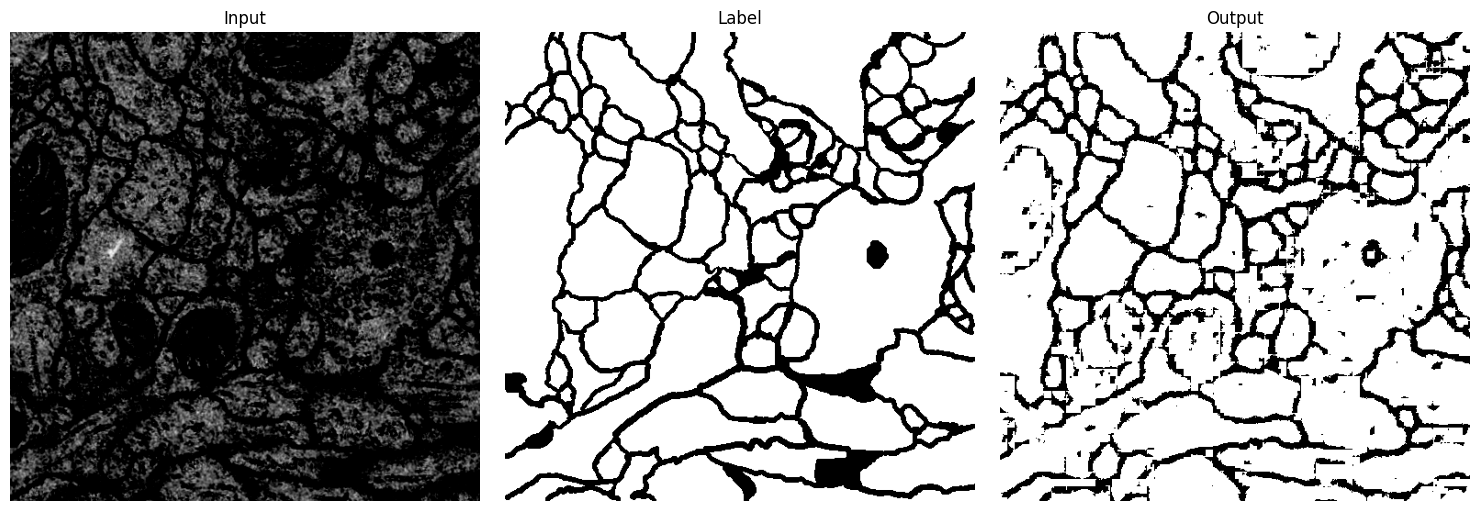

Test loss -> 0.32028502225875854


In [ ]:
model.eval()

test_loss = 0.0

with torch.no_grad():
    for input, label in test_loader:
        input = input.float()
        label = label.long()

        output = model(input)
        print(output.shape)
        loss = loss_fn(output, label)
        test_loss += loss.item()

        plt.figure(figsize=(15, 5))

        input_img = input[0].squeeze()
        label_img = label[0].squeeze()
        output_img = output[0].squeeze().argmax(dim=0)
        print(output[0][0],output[0][1])
        print(output_img[0])

        plt.subplot(1, 3, 1)
        plt.imshow(input_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Input")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(label_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Label")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(output_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Output")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    print("Test loss ->", test_loss / len(test_loader))

## 2. with skip connection ( adding identity while upsampling )

In [ ]:
import torch.nn as nn

class conv_skip(nn.Module):
  def __init__(self):
    super().__init__()
    self.c1 = nn.Conv2d(1,8,kernel_size=3,padding=1)
    self.c2 = nn.Conv2d(8,16,kernel_size=3,padding=1)
    self.c3 = nn.Conv2d(16,16,kernel_size=3,padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.act = nn.ReLU()

  def forward(self,x):
    x=self.c1(x)
    x=self.act(x)
    x=self.pool(x)
    l1=x  # 8*256*256
    x=self.c2(x)
    x=self.act(x)
    x=self.pool(x)
    l2=x  # 16*128*128
    x=self.c3(x)
    x=self.act(x)
    x=self.pool(x)
    return x,l1,l2

class deconv_skip(nn.Module):  ## 아하. 여기서 dim은 conv할때랑 똑같이 가야지 !! 그래야 나중에 skip connection 구현가능
  def __init__(self):
    super().__init__()
    self.deconv1 = nn.ConvTranspose2d(16,16,kernel_size=2,stride=2)
    self.deconv2 = nn.ConvTranspose2d(16,8,kernel_size=2,stride=2)
    self.deconv3 = nn.ConvTranspose2d(8,2,kernel_size=2,stride=2)
    self.act = nn.ReLU()

  def forward(self,x,l1,l2):
    x=self.deconv1(x)
    #print(x.shape)
    x=self.act(x)
    x=x+l2  # 128끼리 합

    x=self.deconv2(x)
    #print(x.shape)
    x=self.act(x)
    x=x+l1

    x=self.deconv3(x)
    #print(x.shape)
    return x

class FCN_with_skip_connection(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = conv_skip()
    self.conv1x1 = convolutionalization()
    self.deconv = deconv_skip()

  def forward(self,x):
    x,l1,l2=self.conv(x)
    x=self.conv1x1(x)
    x=self.deconv(x,l1,l2)
    return x


In [ ]:
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

model_skip = FCN_with_skip_connection()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_skip.parameters(),lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
early_stop_loss = float('inf')

patience = 5

for epoch in tqdm(range(200)):
  train_loss = 0.0
  val_loss = 0.0
  model_skip.train()

  for input,label in tqdm(train_loader):
    label = label.long()
    #print(input.shape)
    #print(input)
    optimizer.zero_grad()
    output = model_skip(input)
    #print(output.shape)
    loss = loss_fn(output,label)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  print("\ntrain loss -> ", train_loss/len(train_loader))
  model_skip.eval()
  with torch.no_grad():
    for input,label in val_loader:
      input = input.float()
      #print(input)
      label = label.long()
      output = model_skip(input)
      loss = loss_fn(output,label)
      val_loss += loss.item()
  print("val loss -> ", val_loss/len(val_loader))

  scheduler.step(val_loss)

  if val_loss < early_stop_loss:
      early_stop_loss = val_loss
      counter = 0  # 성능 개선 시 카운터 초기화
  else:
      counter += 1
      if counter >= patience:
          print("Early stopping triggered")
          break


100%|██████████| 6/6 [00:08<00:00,  1.42s/it]



train loss ->  0.5822669168313345


  0%|          | 1/200 [00:09<30:18,  9.14s/it]

val loss ->  0.5650797486305237



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.5719378888607025


  1%|          | 2/200 [00:19<31:38,  9.59s/it]

val loss ->  0.5546289086341858



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.5628897945086161


  2%|▏         | 3/200 [00:28<31:56,  9.73s/it]

val loss ->  0.5447193384170532



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.5542012751102448


  2%|▏         | 4/200 [00:38<31:21,  9.60s/it]

val loss ->  0.5348143577575684



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.545050303141276


  2%|▎         | 5/200 [00:47<31:11,  9.60s/it]

val loss ->  0.5238879919052124



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.5346441566944122


  3%|▎         | 6/200 [00:57<30:42,  9.50s/it]

val loss ->  0.5117230415344238



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.5230496724446615


  4%|▎         | 7/200 [01:06<30:33,  9.50s/it]

val loss ->  0.4977776110172272



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.5095263123512268


  4%|▍         | 8/200 [01:16<30:42,  9.60s/it]

val loss ->  0.48181262612342834



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.49392420550187427


  4%|▍         | 9/200 [01:25<30:03,  9.44s/it]

val loss ->  0.4646713435649872



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.4766419480244319


  5%|▌         | 10/200 [01:35<30:14,  9.55s/it]

val loss ->  0.4467594623565674



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.45727566878000897


  6%|▌         | 11/200 [01:45<30:31,  9.69s/it]

val loss ->  0.42780745029449463



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.4394464095433553


  6%|▌         | 12/200 [01:55<30:33,  9.75s/it]

val loss ->  0.41114190220832825



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.42469118535518646


  6%|▋         | 13/200 [02:04<30:14,  9.71s/it]

val loss ->  0.39984527230262756



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.4146847426891327


  7%|▋         | 14/200 [02:14<30:04,  9.70s/it]

val loss ->  0.39114999771118164



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.4053906202316284


  8%|▊         | 15/200 [02:25<30:34,  9.91s/it]

val loss ->  0.3860706090927124



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.39850274721781415


  8%|▊         | 16/200 [02:34<30:23,  9.91s/it]

val loss ->  0.37973618507385254



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.39227421085039776


  8%|▊         | 17/200 [02:44<29:51,  9.79s/it]

val loss ->  0.37394917011260986



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.3877677321434021


  9%|▉         | 18/200 [02:53<29:25,  9.70s/it]

val loss ->  0.369292289018631



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.38319286704063416


 10%|▉         | 19/200 [03:03<29:10,  9.67s/it]

val loss ->  0.36885449290275574



100%|██████████| 6/6 [00:09<00:00,  1.65s/it]



train loss ->  0.37958334883054096


 10%|█         | 20/200 [03:14<29:56,  9.98s/it]

val loss ->  0.36126944422721863



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.37362223366896313


 10%|█         | 21/200 [03:24<29:42,  9.96s/it]

val loss ->  0.35784852504730225



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.37087323764959973


 11%|█         | 22/200 [03:33<29:02,  9.79s/it]

val loss ->  0.35597917437553406



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.3659494072198868


 12%|█▏        | 23/200 [03:43<28:37,  9.70s/it]

val loss ->  0.35138797760009766



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3622651944557826


 12%|█▏        | 24/200 [03:52<28:27,  9.70s/it]

val loss ->  0.3482778072357178



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.3589470833539963


 12%|█▎        | 25/200 [04:02<28:17,  9.70s/it]

val loss ->  0.3454630374908447



100%|██████████| 6/6 [00:08<00:00,  1.42s/it]



train loss ->  0.3558581719795863


 13%|█▎        | 26/200 [04:11<27:41,  9.55s/it]

val loss ->  0.34393802285194397



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.35223233699798584


 14%|█▎        | 27/200 [04:20<27:14,  9.45s/it]

val loss ->  0.3397369682788849



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.3491834153731664


 14%|█▍        | 28/200 [04:30<27:07,  9.46s/it]

val loss ->  0.33639633655548096



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.34690379599730176


 14%|█▍        | 29/200 [04:40<27:46,  9.75s/it]

val loss ->  0.333605021238327



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.3441843241453171


 15%|█▌        | 30/200 [04:50<27:54,  9.85s/it]

val loss ->  0.330820232629776



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.340945228934288


 16%|█▌        | 31/200 [05:00<27:26,  9.74s/it]

val loss ->  0.3286338746547699



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.3387056291103363


 16%|█▌        | 32/200 [05:10<27:15,  9.73s/it]

val loss ->  0.32568785548210144



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.33702636261781055


 16%|█▋        | 33/200 [05:19<27:08,  9.75s/it]

val loss ->  0.3235376179218292



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.3333336114883423


 17%|█▋        | 34/200 [05:29<26:36,  9.62s/it]

val loss ->  0.32113632559776306



100%|██████████| 6/6 [00:08<00:00,  1.37s/it]



train loss ->  0.3318283756573995


 18%|█▊        | 35/200 [05:37<25:46,  9.37s/it]

val loss ->  0.3205466568470001



100%|██████████| 6/6 [00:08<00:00,  1.37s/it]



train loss ->  0.33107532064119977


 18%|█▊        | 36/200 [05:46<25:08,  9.20s/it]

val loss ->  0.3184880316257477



100%|██████████| 6/6 [00:08<00:00,  1.42s/it]



train loss ->  0.32694047689437866


 18%|█▊        | 37/200 [05:55<24:54,  9.17s/it]

val loss ->  0.314296692609787



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.3261098514000575


 19%|█▉        | 38/200 [06:05<25:01,  9.27s/it]

val loss ->  0.3136414587497711



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.3244534581899643


 20%|█▉        | 39/200 [06:15<25:13,  9.40s/it]

val loss ->  0.31244412064552307



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.32283803820610046


 20%|██        | 40/200 [06:24<25:13,  9.46s/it]

val loss ->  0.3093281388282776



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.321397786339124


 20%|██        | 41/200 [06:33<24:51,  9.38s/it]

val loss ->  0.30962902307510376



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.32094915211200714


 21%|██        | 42/200 [06:43<24:38,  9.36s/it]

val loss ->  0.3079089820384979



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.31835798919200897


 22%|██▏       | 43/200 [06:53<25:04,  9.58s/it]

val loss ->  0.3064252734184265



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.31788615385691327


 22%|██▏       | 44/200 [07:03<25:00,  9.62s/it]

val loss ->  0.3048267662525177



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.3163429896036784


 22%|██▎       | 45/200 [07:13<25:26,  9.85s/it]

val loss ->  0.3036046326160431



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3150769869486491


 23%|██▎       | 46/200 [07:23<25:10,  9.81s/it]

val loss ->  0.30318963527679443



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3139960418144862


 24%|██▎       | 47/200 [07:33<25:13,  9.89s/it]

val loss ->  0.30105724930763245



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.3131556312243144


 24%|██▍       | 48/200 [07:42<24:41,  9.75s/it]

val loss ->  0.30101051926612854



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.31252971788247425


 24%|██▍       | 49/200 [07:51<24:06,  9.58s/it]

val loss ->  0.3001996576786041



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.31297510862350464


 25%|██▌       | 50/200 [08:01<24:02,  9.62s/it]

val loss ->  0.2988561689853668



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.3124640981356303


 26%|██▌       | 51/200 [08:11<24:05,  9.70s/it]

val loss ->  0.2989092171192169



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.30992697676022846


 26%|██▌       | 52/200 [08:21<24:04,  9.76s/it]

val loss ->  0.29768532514572144



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.3102320233980815


 26%|██▋       | 53/200 [08:30<23:47,  9.71s/it]

val loss ->  0.2967037558555603



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.3081628332535426


 27%|██▋       | 54/200 [08:40<23:20,  9.59s/it]

val loss ->  0.29640451073646545



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3076298038164775


 28%|██▊       | 55/200 [08:49<23:19,  9.65s/it]

val loss ->  0.29584887623786926



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.30794982115427655


 28%|██▊       | 56/200 [08:59<23:12,  9.67s/it]

val loss ->  0.2949557602405548



100%|██████████| 6/6 [00:09<00:00,  1.60s/it]



train loss ->  0.3064717998107274


 28%|██▊       | 57/200 [09:09<23:24,  9.83s/it]

val loss ->  0.2931167781352997



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.305674542983373


 29%|██▉       | 58/200 [09:19<23:26,  9.91s/it]

val loss ->  0.2947559952735901



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.3084780623515447


 30%|██▉       | 59/200 [09:29<23:21,  9.94s/it]

val loss ->  0.29473012685775757



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.30630052586396533


 30%|███       | 60/200 [09:39<22:48,  9.77s/it]

val loss ->  0.29267510771751404



100%|██████████| 6/6 [00:08<00:00,  1.37s/it]



train loss ->  0.3041534175475438


 30%|███       | 61/200 [09:48<21:58,  9.48s/it]

val loss ->  0.29260775446891785



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.30524637301762897


 31%|███       | 62/200 [09:57<21:41,  9.43s/it]

val loss ->  0.29514041543006897



100%|██████████| 6/6 [00:08<00:00,  1.50s/it]



train loss ->  0.30373578270276386


 32%|███▏      | 63/200 [10:07<21:38,  9.48s/it]

val loss ->  0.2897796332836151



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.30355827510356903


 32%|███▏      | 64/200 [10:16<21:30,  9.49s/it]

val loss ->  0.29030439257621765



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.30230411887168884


 32%|███▎      | 65/200 [10:26<21:37,  9.61s/it]

val loss ->  0.2907058000564575



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.30222658812999725


 33%|███▎      | 66/200 [10:36<21:47,  9.76s/it]

val loss ->  0.29131820797920227



100%|██████████| 6/6 [00:08<00:00,  1.45s/it]



train loss ->  0.30141156911849976


 34%|███▎      | 67/200 [10:45<21:15,  9.59s/it]

val loss ->  0.2889147102832794



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.3012506812810898


 34%|███▍      | 68/200 [10:55<21:25,  9.74s/it]

val loss ->  0.28867006301879883



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.30036083857218426


 34%|███▍      | 69/200 [11:05<21:02,  9.64s/it]

val loss ->  0.28968989849090576



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.2998843640089035


 35%|███▌      | 70/200 [11:14<20:55,  9.66s/it]

val loss ->  0.28817614912986755



100%|██████████| 6/6 [00:08<00:00,  1.47s/it]



train loss ->  0.30047603448232013


 36%|███▌      | 71/200 [11:24<20:39,  9.61s/it]

val loss ->  0.2879210412502289



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.3004194994767507


 36%|███▌      | 72/200 [11:34<20:44,  9.73s/it]

val loss ->  0.28827348351478577



100%|██████████| 6/6 [00:09<00:00,  1.50s/it]



train loss ->  0.29880284269650775


 36%|███▋      | 73/200 [11:44<20:34,  9.72s/it]

val loss ->  0.28824231028556824



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.2993215223153432


 37%|███▋      | 74/200 [11:53<20:24,  9.71s/it]

val loss ->  0.2886725962162018



100%|██████████| 6/6 [00:09<00:00,  1.57s/it]



train loss ->  0.299278457959493


 38%|███▊      | 75/200 [12:03<20:28,  9.83s/it]

val loss ->  0.2860412895679474



100%|██████████| 6/6 [00:09<00:00,  1.62s/it]



train loss ->  0.2983037481705348


 38%|███▊      | 76/200 [12:14<20:32,  9.94s/it]

val loss ->  0.2901690900325775



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.29979369044303894


 38%|███▊      | 77/200 [12:24<20:24,  9.96s/it]

val loss ->  0.2852564752101898



100%|██████████| 6/6 [00:09<00:00,  1.52s/it]



train loss ->  0.3009402056535085


 39%|███▉      | 78/200 [12:34<20:16,  9.97s/it]

val loss ->  0.2849471867084503



100%|██████████| 6/6 [00:08<00:00,  1.43s/it]



train loss ->  0.3013889839251836


 40%|███▉      | 79/200 [12:43<19:42,  9.77s/it]

val loss ->  0.28886082768440247



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]



train loss ->  0.29743844270706177


 40%|████      | 80/200 [12:53<19:40,  9.84s/it]

val loss ->  0.28525665402412415



100%|██████████| 6/6 [00:09<00:00,  1.58s/it]



train loss ->  0.29738103846708935


 40%|████      | 81/200 [13:03<19:47,  9.98s/it]

val loss ->  0.2856687307357788



100%|██████████| 6/6 [00:09<00:00,  1.53s/it]



train loss ->  0.2960442652304967


 41%|████      | 82/200 [13:13<19:27,  9.89s/it]

val loss ->  0.2849932610988617



100%|██████████| 6/6 [00:08<00:00,  1.48s/it]



train loss ->  0.2960020552078883


 41%|████      | 82/200 [13:22<19:15,  9.79s/it]

val loss ->  0.2852392792701721
Early stopping triggered


torch.Size([3, 2, 512, 512])
tensor([[-0.6536, -1.0270, -0.3352,  ..., -2.8121, -0.7943, -3.0492],
        [-0.5121, -0.4800, -0.3360,  ..., -1.0292, -1.3975, -1.1946],
        [-0.7585, -0.9923, -0.3099,  ..., -2.9493, -0.6698, -2.6643],
        ...,
        [-1.3765, -0.9629, -1.2602,  ..., -0.9030, -1.2090, -1.1859],
        [-1.2741, -2.6887, -0.3900,  ..., -2.9530, -0.5636, -2.9582],
        [-1.1897, -0.7690, -0.5110,  ..., -1.0815, -0.4331, -0.9418]]) tensor([[-0.1540, -0.6279,  0.2352,  ...,  0.5792,  2.3159,  0.5099],
        [-0.0379, -0.0478,  0.1762,  ...,  2.0569,  2.1484,  2.2104],
        [-0.1952, -0.3136,  0.0822,  ...,  0.7937,  2.1305,  0.2979],
        ...,
        [ 2.0477,  2.2364,  1.7907,  ...,  1.6945,  1.8847,  1.9732],
        [ 1.8688,  0.5567,  1.7956,  ...,  0.6903,  2.2881,  0.0768],
        [ 1.8025,  2.1859,  1.6878,  ...,  2.2722,  2.4255,  1.6944]])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 

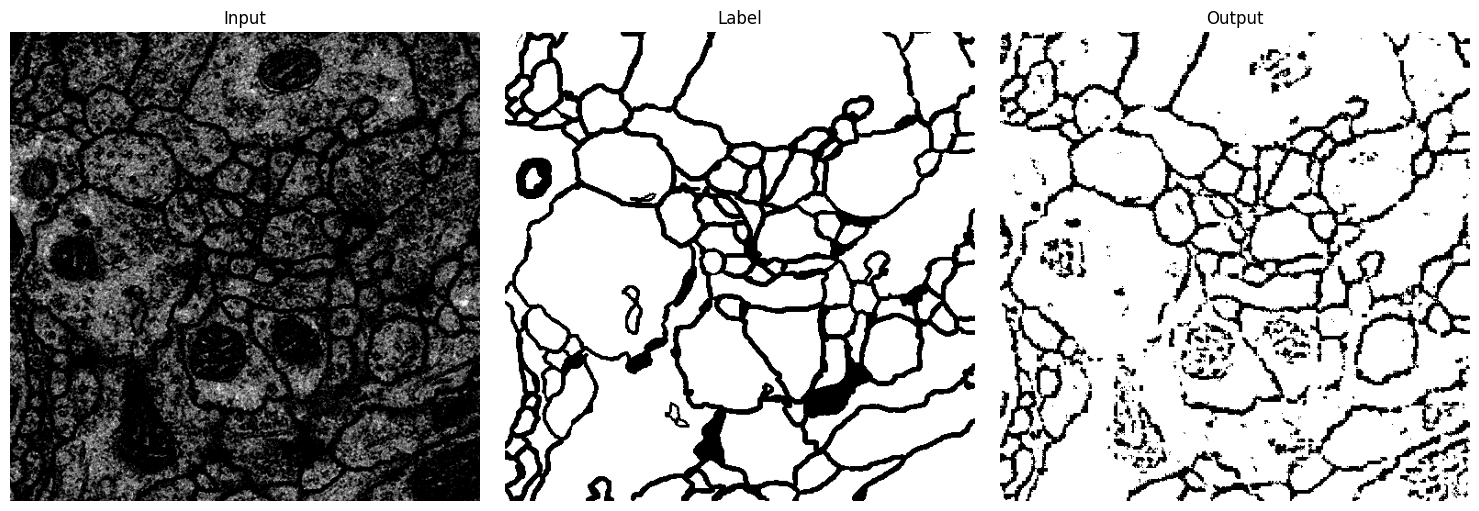

Test loss -> 0.3479292392730713


In [ ]:
model_skip.eval()

test_loss = 0.0

with torch.no_grad():
    for input, label in test_loader:
        input = input.float()
        label = label.long()

        output = model_skip(input)
        print(output.shape)
        loss = loss_fn(output, label)
        test_loss += loss.item()

        plt.figure(figsize=(15, 5))

        input_img = input[0].squeeze()
        label_img = label[0].squeeze()
        output_img = output[0].squeeze().argmax(dim=0)
        print(output[0][0],output[0][1])
        print(output_img[0])

        plt.subplot(1, 3, 1)
        plt.imshow(input_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Input")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(label_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Label")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(output_img.cpu().numpy(), cmap='gray', vmin=0, vmax=1)
        plt.title("Output")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    print("Test loss ->", test_loss / len(test_loader))

# U_net 만들기

- 이전에 한 것처럼 하드코딩이 아니라, 블록단위로 하려면 따로 클래스 지정하고 해당 클래스에서도 forward 써주면 됨.

- 이후 본체 클래스에서 인스턴스 만들고 거기 forward에서 호출

---

